<a href="https://colab.research.google.com/github/krmacit/Neural-Networks-Deep-Learning/blob/master/SWE591_Project1_Part1_Fully_Connected.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from IPython.display import Image
from sklearn.manifold import TSNE

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout, Flatten, Reshape
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

tf.random.set_seed(113)
np.random.seed(113)

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype('float32') / 255
print(x_train.shape)
x_test = x_test.astype('float32') / 255

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)


In [0]:
autoencoder = Sequential(name = 'FullyConnectedEncoder')

autoencoder.add(Flatten(input_shape=(28,28,1), name = 'flatten_layer'))
autoencoder.add(Dense(196, activation='relu', name='encoder_layer_1'))
autoencoder.add(Dense(64, activation='relu', name='encoder_layer_2'))
autoencoder.add(Dense(10, activation='relu', name='latent_layer'))
autoencoder.add(Dense(64, activation='relu', name='decoder_layer_1'))
autoencoder.add(Dense(196, activation='relu', name='decoder_layer_2'))
autoencoder.add(Dense(784, activation='relu', name='output_layer'))
autoencoder.add(Reshape((28, 28, 1)))

In [0]:
autoencoder.summary()

Model: "FullyConnectedEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_layer (Flatten)      (None, 784)               0         
_________________________________________________________________
encoder_layer_1 (Dense)      (None, 196)               153860    
_________________________________________________________________
encoder_layer_2 (Dense)      (None, 64)                12608     
_________________________________________________________________
latent_layer (Dense)         (None, 10)                650       
_________________________________________________________________
decoder_layer_1 (Dense)      (None, 64)                704       
_________________________________________________________________
decoder_layer_2 (Dense)      (None, 196)               12740     
_________________________________________________________________
output_layer (Dense)         (None, 784)     

In [0]:
adam = tf.keras.optimizers.Adam()
autoencoder.compile(optimizer=adam, loss='mean_squared_error')

In [0]:
autoencoder.fit(x_train, x_train, 
                epochs = 10, 
                batch_size = 64, 
                shuffle = True, 
                validation_data= (x_test, x_test))

Epoch 1/10
938/938 [==============================] - 2s 3ms/step - loss: 0.0371 - val_loss: 0.0283
Epoch 2/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0266 - val_loss: 0.0251
Epoch 3/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0245 - val_loss: 0.0233
Epoch 4/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0228 - val_loss: 0.0219
Epoch 5/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0216 - val_loss: 0.0213
Epoch 6/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0210 - val_loss: 0.0209
Epoch 7/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0206 - val_loss: 0.0203
Epoch 8/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0202 - val_loss: 0.0197
Epoch 9/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0196 - val_loss: 0.0197
Epoch 10/10
938/938 [==============================] - 2s 2ms/step - loss: 0.0194 - val_loss: 0.0194

In [0]:
reconstructed_imgs = autoencoder.predict(x_test)

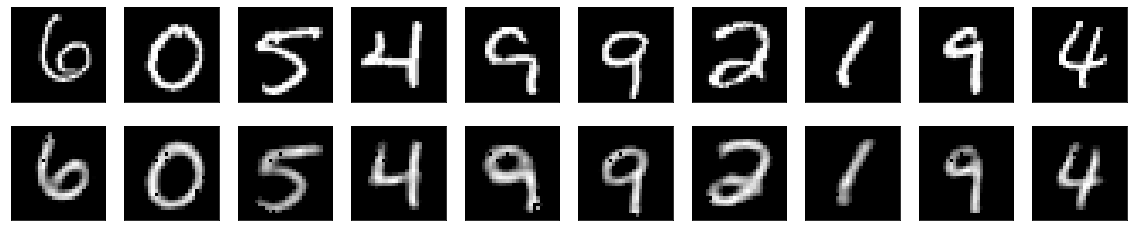

In [0]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i+100].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i+100].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
model = TSNE(n_components=2, random_state=0)
x_tnse = x_train
y_tnse = y_train.reshape(len(y_train),1)
tsne = model.fit_transform(x_tnse.reshape((len(x_tnse),28*28)))

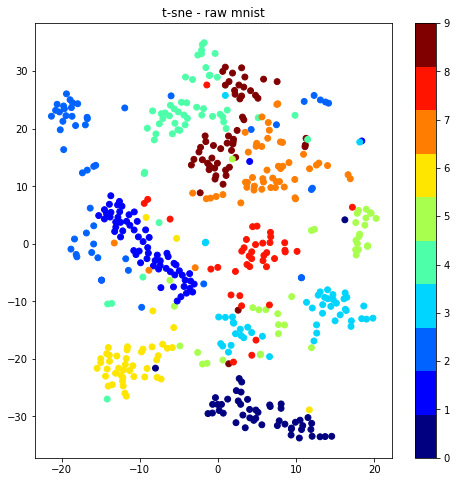

In [0]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_tnse,s=35,cmap=cmap)
plt.title("t-sne - raw mnist")
plt.colorbar()
plt.show()

In [0]:
model = TSNE(n_components=2, random_state=0)
x_tnse = x_train
x_tnse = autoencoder.predict(x_tnse)
y_tnse = y_train.reshape(len(y_train),1)
tsne = model.fit_transform(x_tnse.reshape((len(x_tnse),28*28)))

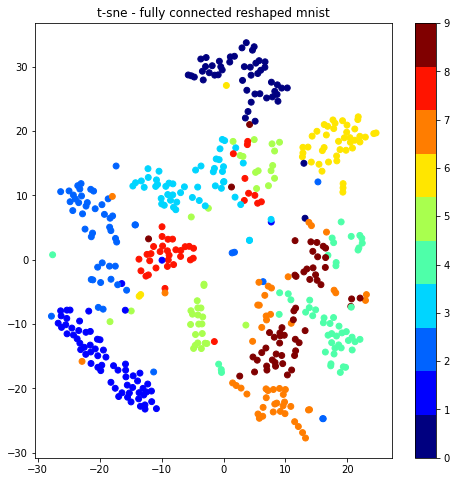

In [0]:
plt.figure(figsize=(8,8))
cmap = cm.get_cmap('jet', 10)
plt.scatter(x=tsne[:,0],y=tsne[:,1],c=y_tnse,s=35,cmap=cmap)
plt.title("t-sne - fully connected reshaped mnist")
plt.colorbar()
plt.show()

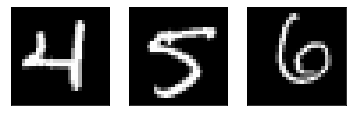

In [0]:
plt.figure(figsize=(6, 4))
ax = plt.subplot(2, 3, 1)
plt.imshow(x_test[103].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 3, 2)
plt.imshow(x_test[102].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 3, 3)
plt.imshow(x_test[100].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.show()

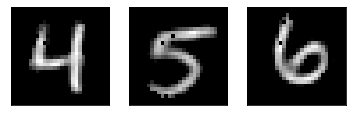

In [0]:
plt.figure(figsize=(6, 4))

ax = plt.subplot(2, 3, 1)
plt.imshow(reconstructed_imgs[103].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 3, 2)
plt.imshow(reconstructed_imgs[102].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(2, 3, 3)
plt.imshow(reconstructed_imgs[100].reshape(28, 28))
plt.gray()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.show()